Feature Selection with PyEMMA in a Molecular System
===========================

In this notebook we will give a brief overview of some of PyEMMA's capabilities to extract collective variables from
MD simulations. We will demonstrate how to:
1. create a **Reader**
2. select and compare **features**
3. MDTrajs **Atom selection language**
4. create **custom** features

Will will use a data set of a pentapeptide.

First we import pyemma and check what version we are using.

In [1]:
from __future__ import print_function
import pyemma
pyemma.version

'2.4'

This notebook has been tested for version 2.0. If you are using a different version some adaptations may be required.

Now we import a few general packages, including basic numerics and algebra routines (numpy) and plotting routines (matplotlib), and makes sure that all plots are shown inside the notebook rather than in a separate window (nicer that way).

In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Now we create an `alias` for sub-package of PyEMMA we are going to use (save us some typing work)

In [3]:
coor = pyemma.coordinates

Load pentapeptide coordinates and select features
------

We first have to load the PDB file and the trajectory data, in this case for WW-pentapeptide.

In [4]:
indir = './data/penta_peptide'
topfile =  indir + '/init-ww-penta.pdb'
from glob import glob # glob supports wildcard selections, very useful ;-)
traj_list = glob(indir + '/*-protein.xtc')[:10]

First we create a `MDFeaturizer` object. This object handles the selection and computation of collective variables from the simulation data. To construct it, we need to pass a topology file (eg. .pdb or .gro file).

In [5]:
#print(topfile)
feat = coor.featurizer(topfile)

The Featurizer will read the topfile and make it available as a mdtraj.Topology object. The Topology object contains information about atoms, residue names, chains, bonds etc. (See http://mdtraj.org/latest/api/generated/mdtraj.Topology.html)

It can also be used to select atom indices used further to extract collective variables via a VMD like language:

In [6]:
#feat.topology.select('name CA')
feat.topology

<mdtraj.Topology with 1 chains, 5 residues, 94 atoms, 95 bonds at 0x7ff80517efd0>

We provide a shortcut for this function directly in featurizer

In [7]:
[rs for rs in feat.topology.residues]

[TRP1, LEU2, ALA3, LEU4, LEU5]

In [8]:
leu=feat.topology.residues.__next__()

In [9]:
for leu in feat.topology.residues:
  print([atom for atom in leu.atoms][-6])

TRP1-CZ2
LEU2-CD2
ALA3-CB
LEU4-CD2
LEU5-HD22


In [10]:
# This alias "feat.select(...)" goes back to the "feat.topology.select(...)" attribute
# AND! all of this select is commuted to the MDTraj atomselect functionality
# SO... see the MDTraj docs about how to use the selection language
feat.select('name CA')
#feat.describe()

array([ 3, 27, 46, 56, 75])

There are also shortcuts for commonly used selections:

In [11]:
feat.describe()
#feat.select_Ca() == feat.select('name CA')

[]

In [12]:
print(feat.select_Heavy())
#print(feat.select_Heavy() == feat.select('mass > 2'))
feat.describe()

[ 0  3  5  8  9 11 13 14 15 17 19 21 23 24 25 27 29 32 34 38 42 43 44 46 48
 52 53 54 56 58 61 63 67 71 72 73 75 77 80 82 86 90 91 92]


[]

Select the nitrogen(s) of residue 1

In [13]:
feat.select('resid 1 and name N')

array([25])

For a brief overview of the selection features of MDTraj, please have a look at http://mdtraj.org/latest/atom_selection.html

There are several methods in the Featurizer, which enable a quick addition of a feature space like torsion angles or pairwise distances.

In [14]:
feat.add_distances(feat.select_Ca())
feat.describe()

27-01-18 23:30:31 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  The 1D arrays input for add_distances() have been sorted, and index duplicates have been eliminated.
Check the output of describe() to see the actual order of the features


['DIST: TRP 1 CA 3 - LEU 2 CA 27',
 'DIST: TRP 1 CA 3 - ALA 3 CA 46',
 'DIST: TRP 1 CA 3 - LEU 4 CA 56',
 'DIST: TRP 1 CA 3 - LEU 5 CA 75',
 'DIST: LEU 2 CA 27 - ALA 3 CA 46',
 'DIST: LEU 2 CA 27 - LEU 4 CA 56',
 'DIST: LEU 2 CA 27 - LEU 5 CA 75',
 'DIST: ALA 3 CA 46 - LEU 4 CA 56',
 'DIST: ALA 3 CA 46 - LEU 5 CA 75',
 'DIST: LEU 4 CA 56 - LEU 5 CA 75']

The describe method returns a string for each variable in the output vector:

In [15]:
feat.add_chi1_torsions(cossin=True, periodic=True)
feat.add_residue_mindist()
feat.describe()
#feat.active_features

27-01-18 23:30:32 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


['DIST: TRP 1 CA 3 - LEU 2 CA 27',
 'DIST: TRP 1 CA 3 - ALA 3 CA 46',
 'DIST: TRP 1 CA 3 - LEU 4 CA 56',
 'DIST: TRP 1 CA 3 - LEU 5 CA 75',
 'DIST: LEU 2 CA 27 - ALA 3 CA 46',
 'DIST: LEU 2 CA 27 - LEU 4 CA 56',
 'DIST: LEU 2 CA 27 - LEU 5 CA 75',
 'DIST: ALA 3 CA 46 - LEU 4 CA 56',
 'DIST: ALA 3 CA 46 - LEU 5 CA 75',
 'DIST: LEU 4 CA 56 - LEU 5 CA 75',
 'COS(CHI1 0 TRP 1 )',
 'SIN(CHI1 0 TRP 1 )',
 'COS(CHI1 0 LEU 2 )',
 'SIN(CHI1 0 LEU 2 )',
 'COS(CHI1 0 LEU 4 )',
 'SIN(CHI1 0 LEU 4 )',
 'COS(CHI1 0 LEU 5 )',
 'SIN(CHI1 0 LEU 5 )',
 'RES_DIST (closest-heavy) TRP1 - LEU4',
 'RES_DIST (closest-heavy) TRP1 - LEU5',
 'RES_DIST (closest-heavy) LEU2 - LEU5']

In [16]:
feat.active_features

In [17]:
inp = coor.source(traj_list, feat)
print('number of trajectories = ', inp.number_of_trajectories())
print('trajectory length = ', inp.trajectory_length(0))
print('trajectory time step = ', 500.0 / (inp.trajectory_length(0) - 1), 'ns')
print('number of dimension = ', inp.dimension())

Box(children=(Text(value=''), IntProgress(value=0)))

number of trajectories =  9
trajectory length =  5001
trajectory time step =  0.1 ns
number of dimension =  21


In [18]:
inp.trajectory_lengths()

array([5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001])

Now look at the space we have just extracted. The method **get_output** will extract all the previously selcted features from the reader. Note that this can only be done for a low amount of data, because we need to store everything in memory.

To perform NumPy operations on the whole data set, we convert the list of NumPy arrays into a single array, by concatenate along the time dimension (axis=0). 

In [19]:
lags = [i for i in range(1,10)]
ticas = [pyemma.coordinates.tica(inp, lag=lag, var_cutoff=.9,)
         for lag in lags]

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

In [20]:
import matplotlib
from matplotlib import pyplot as plt

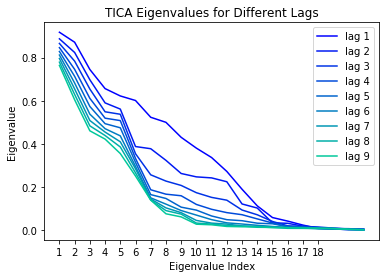

In [21]:
amount=ticas[0].eigenvalues.shape[0]

for i,tica in enumerate(ticas):
    #c = [float(i)/float(amount), 0.0, float(amount-i)/float(amount)]
    #plt.plot(tica_dih.eigenvalues[i]*egv,color=plt.cm.winter(20*(amount-i)))
    #plt.plot(egv,color=plt.cm.winter(20*i))
    
    plt.plot(range(1,tica.eigenvalues.shape[0]+1),
             abs(tica.eigenvalues),
             color=plt.cm.winter(25*i),
             label='lag %s' % tica.describe().split(',')[1].split(';')[0].split('=')[1].strip()
            )

plt.title('TICA Eigenvalues for Different Lags')
plt.xticks(range(20)[1:-1])
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.legend()

In [22]:
#plt.cm.afmhot(20)
tica.describe().split(',')[1].split(';')[0].strip()

'lag = 9'

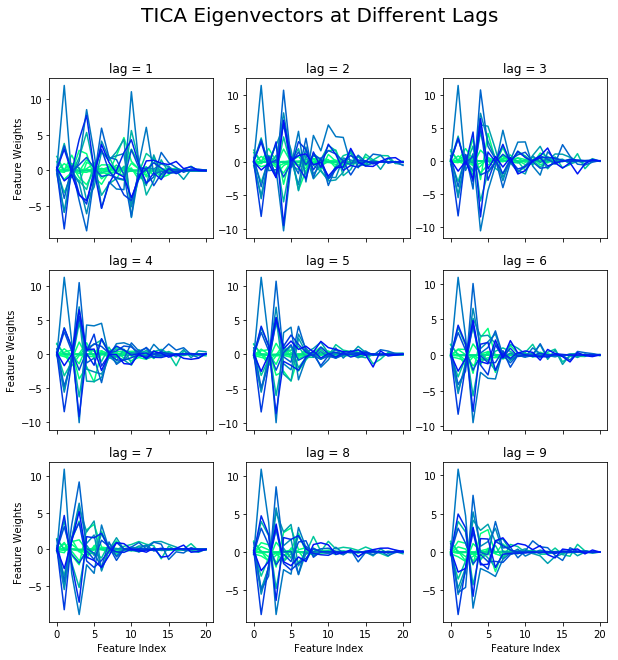

In [23]:
amount=ticas[0].eigenvectors.shape[0]

fig, axes = subplots(3, 3, figsize=(10, 10), sharex=True,)# sharey=True)
for j,axis in enumerate(numpy.hstack(axes)):
    tica = ticas[j]
    if j%3==0:
        axis.set_ylabel("Feature Weights")
    if j>5:
        axis.set_xlabel("Feature Index")
    #print(tica.describe())
    for i,egv in enumerate(reversed(tica.eigenvectors)):
        #c = [float(i)/float(amount), 0.0, float(amount-i)/float(amount)]
        axis.plot(egv,color=plt.cm.winter(20*(amount-i)))
        axis.set_title(tica.describe().split(',')[1].split(';')[0].strip())
        #plt.plot(egv,color=plt.cm.winter(20*i))  

fig.suptitle("TICA Eigenvectors at Different Lags",size=20)

Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Box(children=(Text(value=''), IntProgress(value=0)))

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


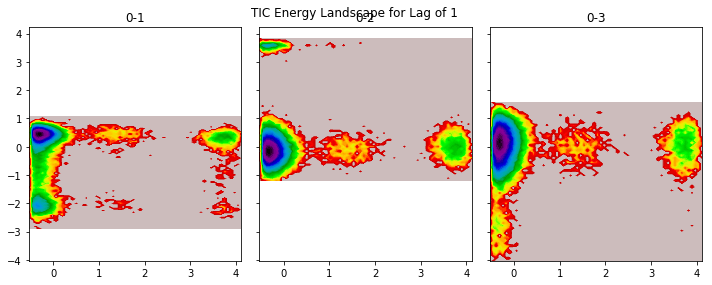

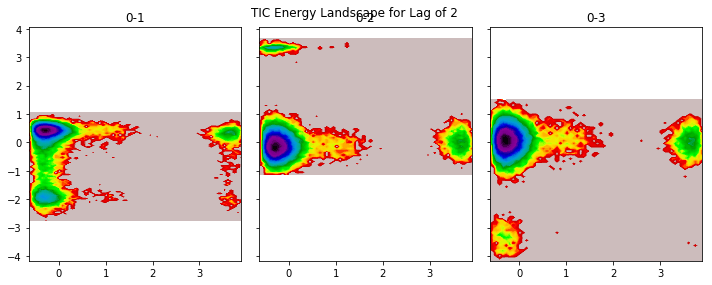

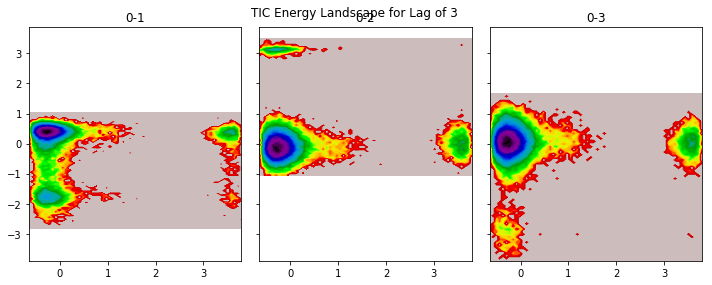

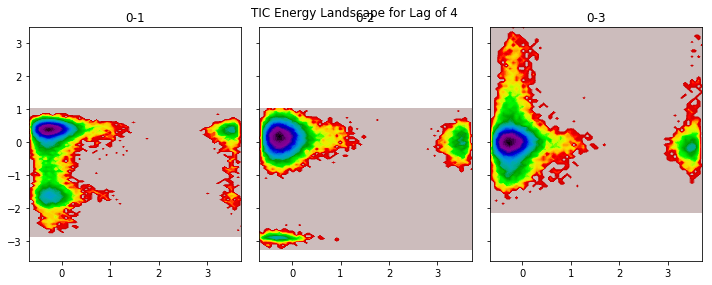

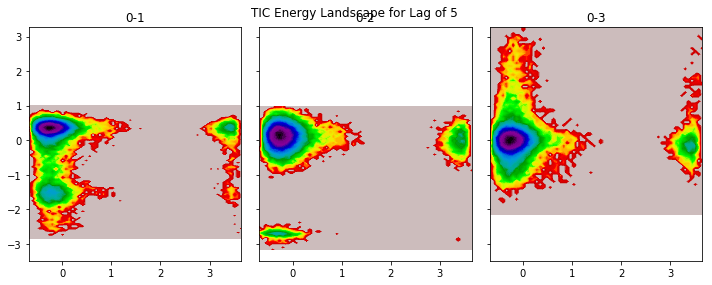

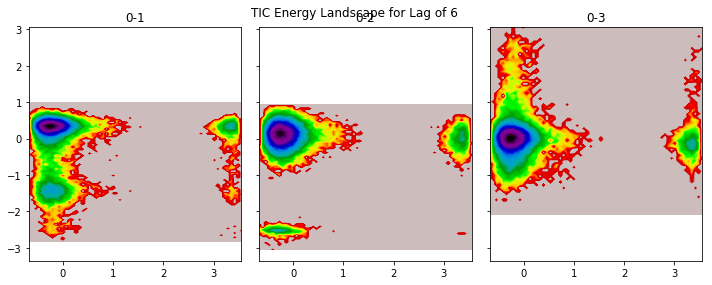

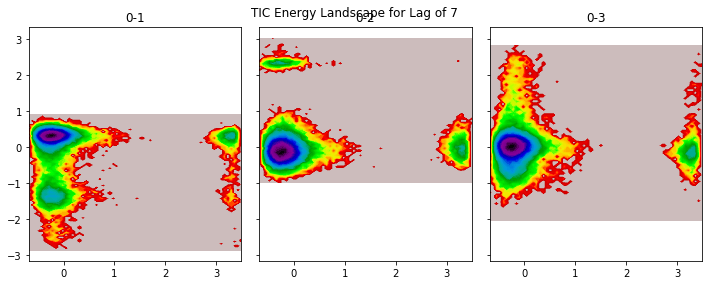

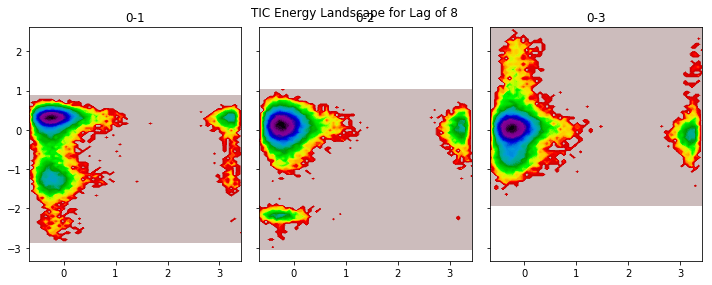

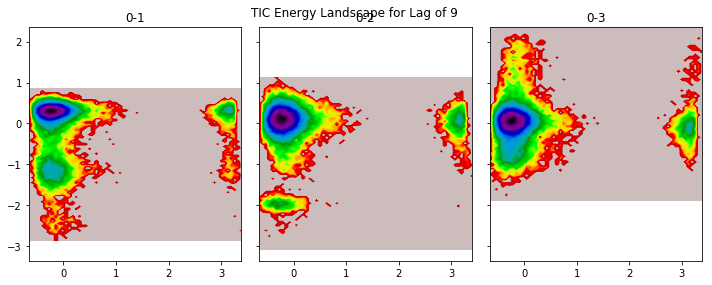

In [24]:
import itertools

ystacked_ticas = list()

for tica in ticas:
    ystacked_tica = np.concatenate(tica.get_output())
    ystacked_ticas.append(ystacked_tica)

    pairs = tuple(itertools.combinations(range(ystacked_tica.shape[1]), 2))

    fig, axes = subplots(1,3, figsize=(10,4), sharex=True, sharey=True)
    fig.suptitle('TIC Energy Landscape for Lag of %s ' % tica.describe().split(',')[1].split(';')[0].split('=')[1].strip())
    for ax, (i, j) in zip(axes, pairs[:]):
        pyemma.plots.plot_free_energy(ystacked_tica[:, i], ystacked_tica[:, j], nbins=64, ax=ax, cbar=False)
        ax.set_title("%i-%i" % (i,j))
    fig.tight_layout()

/home/johnrobot/miniconda3/envs/fresh3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


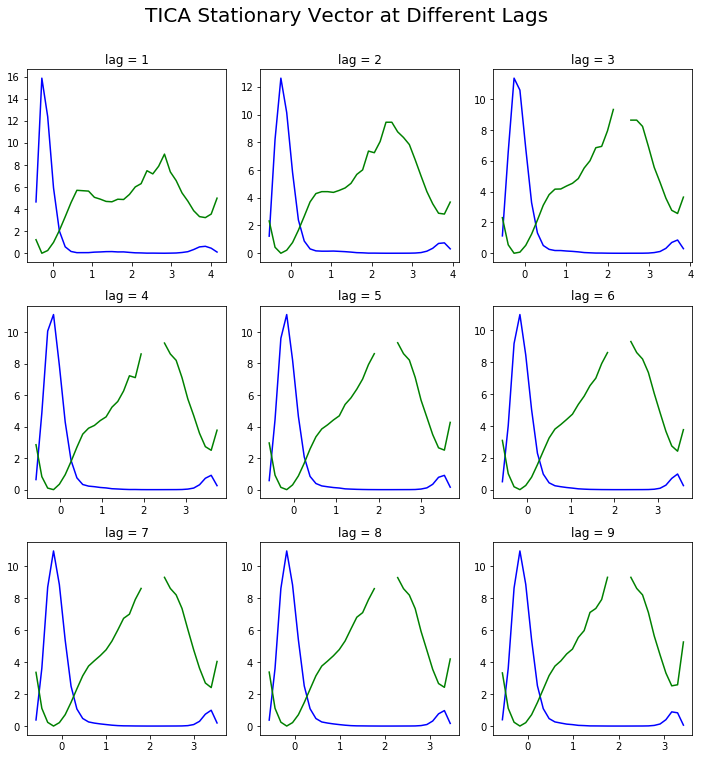

In [25]:
fig, axes = subplots(3,3, figsize=(10,10),)# sharex=True,)# sharey=True)
axes = np.hstack(axes)
for i, ystacked_tica in enumerate(ystacked_ticas):
    ax = axes[i]
    tica0_counts, tica0_coords = np.histogram(ystacked_tica[:,0],bins=32)

    #plt.plot(tica0_coords[1:], tica0_counts)
    energy_shift = np.log(max(tica0_counts))
    ax.plot(tica0_coords[1:], np.divide(tica0_counts, 1000, ), color='blue')#ystacked_tica.shape[0]))
    ax.plot(tica0_coords[1:], energy_shift + -np.log(tica0_counts), color='green')
    #print(tica0_counts[0]/ystacked_tica.shape[0])
    ax.set_title(ticas[i].describe().split(',')[1].split(';')[0].strip())
    #plt.plot(egv,color=plt.cm.winter(20*i))  

fig.suptitle("TICA Stationary Vector at Different Lags",size=20,y=1.05)
fig.tight_layout()

Excercise
=====

Create a custom feature to compute the radius of gyration (RG). 
Rg is a measure of the size of a molecule, and is computed as the square root of the Rg^2 value in this formula:

$Rg^2 = \frac{1}{M} \displaystyle \sum_i m_i(r_i - r_{cm})^2 $

where M is the total mass of the group, $r_{cm}$ is the center-of-mass position of the molecule, and the sum is over all atoms of the molecule.

1. Checkout the documentation of the MDFeaturizer, the method of intereset is **now add_custom_func()**
2. Define a radius of gyration function, which accepts as first argument a mdtraj.Trajectory object.
   
   Hint: the coordinates of the Trajectory are stored in the attribute **xyz**. The shape of this array is (n_frames, n_atoms, 3)
3. Add your custom function to the featurizer and extract the collective variable for all trajectories.
   
   Hints:
   * PyEMMA likes to do stuff in single precision (if there is no actual reason to go for double precision).
   The function numpy.astype casts your array to desired data types. Alternatively you can create the array with appropiate dtype argument (np.float32).
   * We currently only support 2d output from Features to make further processing easy (no extra shape assumptions needed).

In [26]:
microstatess = list()
msms = list()

for i,ystacked_tica in enumerate(ystacked_ticas):
    microstates = coor.cluster_kmeans(ystacked_tica)
    microstatess.append(microstates)
    
    msm = pyemma.msm.estimate_markov_model(microstates.dtrajs, lag=lags[i])
    msms.append(msm)

27-01-18 23:32:29 pyemma.coordinates.clustering.kmeans.KmeansClustering[19] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:33 pyemma.coordinates.clustering.kmeans.KmeansClustering[19] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:34 pyemma.coordinates.clustering.kmeans.KmeansClustering[20] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:38 pyemma.coordinates.clustering.kmeans.KmeansClustering[20] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:38 pyemma.coordinates.clustering.kmeans.KmeansClustering[21] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:41 pyemma.coordinates.clustering.kmeans.KmeansClustering[21] INFO     Cluster centers converged after 8 steps.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:42 pyemma.coordinates.clustering.kmeans.KmeansClustering[22] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:45 pyemma.coordinates.clustering.kmeans.KmeansClustering[22] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:45 pyemma.coordinates.clustering.kmeans.KmeansClustering[23] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:49 pyemma.coordinates.clustering.kmeans.KmeansClustering[23] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:49 pyemma.coordinates.clustering.kmeans.KmeansClustering[24] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:52 pyemma.coordinates.clustering.kmeans.KmeansClustering[24] INFO     Cluster centers converged after 10 steps.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:53 pyemma.coordinates.clustering.kmeans.KmeansClustering[25] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:56 pyemma.coordinates.clustering.kmeans.KmeansClustering[25] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:56 pyemma.coordinates.clustering.kmeans.KmeansClustering[26] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:32:59 pyemma.coordinates.clustering.kmeans.KmeansClustering[26] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:33:00 pyemma.coordinates.clustering.kmeans.KmeansClustering[27] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=212 as n_clusters.


Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

27-01-18 23:33:03 pyemma.coordinates.clustering.kmeans.KmeansClustering[27] INFO     Cluster centers converged after 9 steps.


Box(children=(Text(value=''), IntProgress(value=0)))

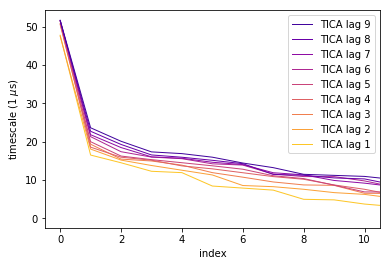

In [27]:
#fig, axes = subplots(3,3, sharex=True, sharey=True)
#for i,ax in enumerate(np.hstack(axes)):
fig, ax = plt.subplots(1)
for i,msm in enumerate(msms):
    #ax.plot(msms[i].timescales(),
    ax.plot(msm.timescales(),
             linewidth=1,
             label='TICA lag %d' % lags[i],
             color=plt.cm.plasma(25*(len(lags)-i)),
             #marker='o'
            )
plt.xlabel('index')
plt.ylabel(r'timescale (1 $\mu$s)')
plt.xlim(-0.5,10.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right')
#plt.legend()

In [28]:
msm.eigenvalues()

array([  1.00000000e+00,   8.40245362e-01,   6.83436392e-01,
         6.39415504e-01,   5.95369312e-01,   5.87153718e-01,
         5.69203266e-01,   5.36480645e-01,   5.06807295e-01,
         4.57260984e-01,   4.48378510e-01,   4.39806586e-01,
         4.11091619e-01,   3.47225319e-01,   3.29755746e-01,
        -1.66991749e-01,   1.59704418e-01,   1.52535552e-01,
         1.49072532e-01,  -1.37253141e-01,   1.18714622e-01,
        -1.16549601e-01,  -1.15281936e-01,   1.13711398e-01,
        -1.12449638e-01,   1.09408897e-01,  -1.02130502e-01,
         1.02082412e-01,   1.00584682e-01,   1.00223342e-01,
        -9.86540401e-02,   9.71991809e-02,  -9.61520498e-02,
         9.31675913e-02,  -9.29003817e-02,   9.20113243e-02,
        -9.05906091e-02,   8.95767596e-02,  -8.76954694e-02,
        -8.72397276e-02,   8.47307344e-02,  -8.28226066e-02,
         8.27438229e-02,  -8.19034346e-02,   8.17441367e-02,
        -8.09929214e-02,  -7.84786566e-02,   7.84552660e-02,
         7.64023506e-02,

In [31]:
#its = pyemma.msm.its(microstatess[3].dtrajs, lags=lags)

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

Box(children=(Text(value=''), IntProgress(value=0)))

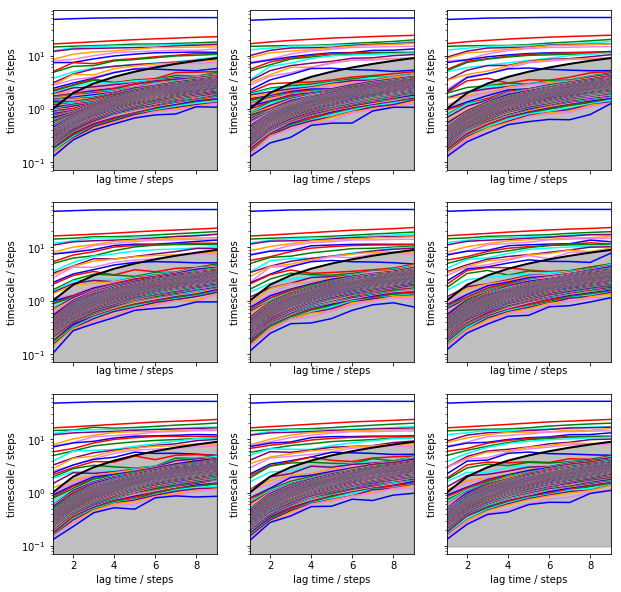

In [37]:
#Compare the ITS over TICA calculation lag orders of 0 (shown), 1, and 2
fig, axes = subplots(3,3, figsize=(10,10), sharex=True, sharey=True)
for i,ax in enumerate(np.hstack(axes)):
    its=pyemma.msm.its(microstatess[i].dtrajs, lags=lags)
    pyemma.plots.plot_implied_timescales(its, ax=ax)

In [ ]:
feat.add
feat.active_features=[]

def rg(traj):
   """ Computes the radius of gyration

   Parameters
   ----------
   traj: mdtraj.Trajectory object
   
   Returns
   -------
   rg: np.ndarray(n, 1)
      where n is the number of frames of traj.
   """

    # first: compute COM
    #                  M
    
   #com = np.zeros((1,3))
   #mass = 0.
   #
   #for atom in traj.atoms:
   #    com += atom.xyz
    coor = traj.xyz
    mass = coor.mean(axis=1)
    center = (xyz.trajspose( ( 1,0,2 )) - center ).transpose( (1,0,2))
    sq_dist = (centered**2)

    result = np.empty(len(traj), 1)
    return result

feat.add_custom_func(rg, dim=1)

In [ ]:
out = np.vstack(inp.get_output())

In [ ]:
plot(out)

In [90]:
# figuring out the numpy objects...
com=np.zeros((1,3))
coor=np.zeros((1,3))
for i in range(3):
    coor[0][i] += i

#coor
com += coor
print(com)

[[ 0.  1.  2.]]


In [15]:
import mdtraj
traj = mdtraj.load(traj_list,top=topfile)
shape= traj.xyz.shape
coor = traj.xyz
mass = coor.mean(axis=1)

In [89]:
mass




array([[ 2.11828732,  2.13021255,  1.85671246],
       [ 2.13753152,  2.13466001,  1.85767066],
       [ 2.12905359,  2.13367033,  1.84804261],
       ..., 
       [ 2.34800029,  1.84920263,  2.29911757],
       [ 2.3643198 ,  1.84467018,  2.33691478],
       [ 2.36773419,  1.86704242,  2.3340106 ]], dtype=float32)